<a href="https://colab.research.google.com/github/SameerShafayet/Attention-Visualizer-/blob/main/Attention_Visualizer_BERT_Base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install transformers datasets matplotlib seaborn

In [2]:
from transformers import BertTokenizer, BertModel
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load tokenizer and model with output_attentions=True
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertModel.from_pretrained("bert-base-uncased", output_attentions=True)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [3]:
sentence = "Transformers use attention to capture contextual relationships."

encoded = tokenizer(sentence, return_tensors='pt')

with torch.no_grad():
    outputs = model(**encoded)

# outputs.attentions is a list -> one element per layer
# Each attention matrix shape is: (batch, heads, tokens, tokens)
attentions = outputs.attentions
len(attentions)

12

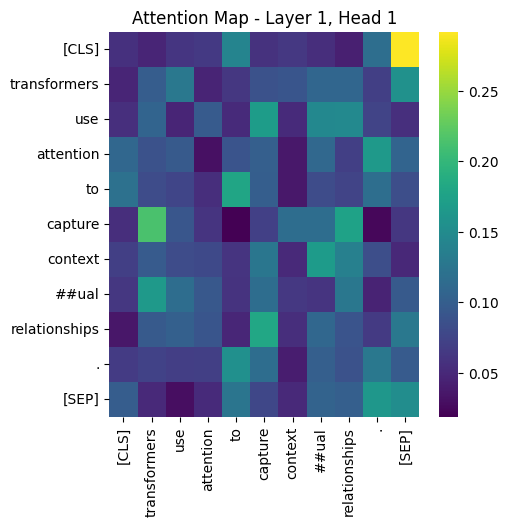

In [5]:
layer = 0          # choose any layer (0–11)
head = 0           # choose any head (0–11)

attn = attentions[layer][0, head].detach().numpy()

tokens = tokenizer.convert_ids_to_tokens(encoded['input_ids'][0])

plt.figure(figsize=(5, 5))
sns.heatmap(attn, xticklabels=tokens, yticklabels=tokens, cmap="viridis")
plt.title(f"Attention Map - Layer {layer+1}, Head {head+1}")
plt.show()

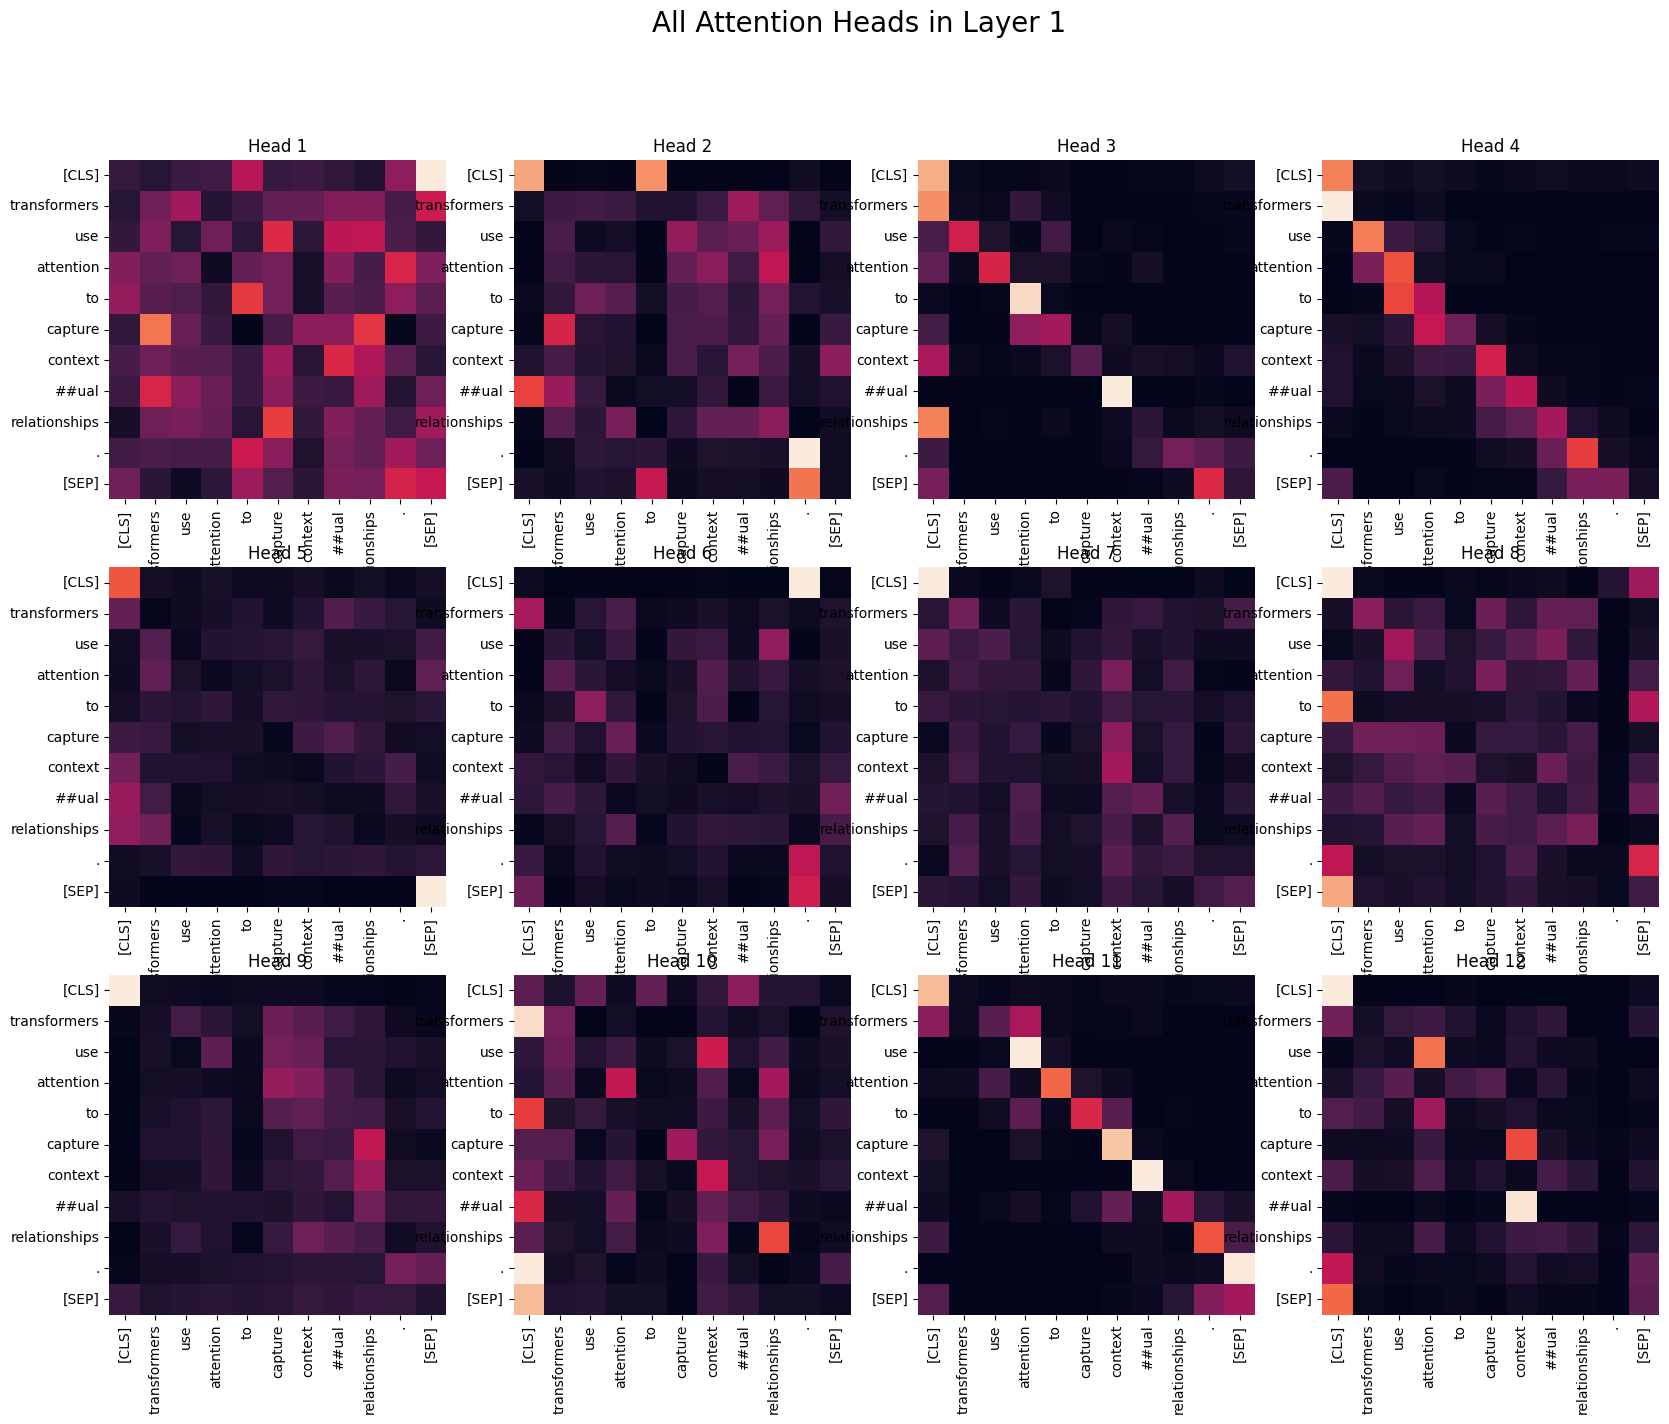

In [6]:
layer = 0
heads = attentions[layer][0]

fig, axes = plt.subplots(3, 4, figsize=(20, 15))

for i, ax in enumerate(axes.flat):
    if i < heads.shape[0]:
        att = heads[i].detach().numpy()
        sns.heatmap(att, xticklabels=tokens, yticklabels=tokens, ax=ax, cbar=False)
        ax.set_title(f"Head {i+1}")

plt.suptitle(f"All Attention Heads in Layer {layer+1}", fontsize=20)
plt.show()